In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- load the data from lat-lng.csv

X axis -> Latitude
Y axis -> Longitude
4 Quadrants Split

In [8]:
df = pd.read_csv('with_user_id.csv')
print(len(df))
df.describe()
df.info()

1048575
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
userid    1048575 non-null int64
lat       1048575 non-null float64
lng       1048575 non-null float64
dtypes: float64(2), int64(1)
memory usage: 24.0 MB


- do you need to clean up the data?

In [10]:
# Find data for US regio
df_us = df[(df['lat']>0) & (df['lng']<0)]
len(df), len(df_us)

(1048575, 932093)

In [11]:
# Instead of operating on 932093 number of rows, lets sample them to 10%
df_us_samp = df_us.sample(frac=0.1, random_state=101)
len(df_us_samp)

93209

- plot the graph for understanding data

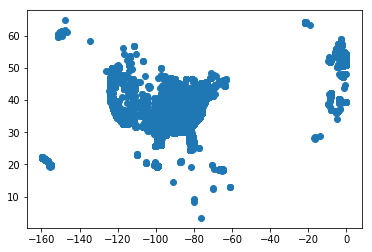

In [12]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'])

- create an object of KMeans by importing from sklearn.cluster

In [15]:
from sklearn.cluster import KMeans
print(KMeans.__doc__)

K-Means clustering

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random' or an ndarray}
        Method for initialization, defaults to 'k-means++':

        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.

        'random': choose k observations (rows) at random from data for
        the initial centroids.

        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.

    n_init : int, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.

    max_iter : int, de

In [41]:
kmeans = KMeans(n_clusters=10)

- use fit of the kmeans object and pass in data

In [42]:
kmeans.fit(df_us_samp[['lat','lng']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

- check the cluster centers

In [36]:
print(len(kmeans.labels_))
print(kmeans.cluster_centers_)
print(kmeans.cluster_centers_[:])
print(kmeans.cluster_centers_[:,0])
print(kmeans.cluster_centers_[:,1])

93209
[[  42.44409874  -83.6193844 ]
 [  37.69423088 -122.17340195]
 [  51.5549918    -0.48655733]
 [  39.80110873 -105.166705  ]
 [  21.28968866 -157.80697665]
 [  32.88726884  -96.97375494]
 [  40.82955852  -73.88849466]
 [  34.27978697  -84.08549127]
 [  48.02727485 -122.52430379]
 [  28.48196437  -81.73866076]
 [  33.33376066 -117.1793915 ]
 [  39.22806075  -94.84514411]
 [  18.05157775  -66.22825051]
 [  36.09172994 -115.14826755]
 [  30.26919251  -97.7845896 ]
 [  61.1172029  -149.53287002]
 [  38.83522224  -77.08683941]
 [  38.72221309   -7.35935451]
 [  44.89334092  -93.36135051]
 [  44.50475323  -74.82270288]
 [  30.3401093   -89.12701059]
 [  42.38959717  -71.11268366]
 [  33.45586222 -111.80356882]
 [  42.20285695  -87.83721526]
 [  35.78392348  -93.07607529]
 [  40.47625964  -81.59377504]
 [  21.99752367 -107.91702198]
 [  35.98939896  -78.77689929]
 [  35.64139524  -97.4483701 ]
 [  34.02911142 -118.26396214]
 [  64.10623623  -21.52705976]
 [  36.03792645  -86.77496484]
 [

In [22]:
for lat, lng in kmeans.cluster_centers_:
    print (lat, lng)

42.444098742095065 -83.6193844021655
37.694230875089225 -122.17340194887399
51.554991802878654 -0.4865573314459368
39.80110873243931 -105.1667050008289
21.28968866035076 -157.80697665215078
32.88726883759327 -96.97375493987064
40.82955851754525 -73.88849466487368
34.279786969006494 -84.08549126644249
48.027274854149205 -122.52430378605453
28.481964368417476 -81.73866076181815
33.33376066178144 -117.17939150484031
39.22806074508954 -94.8451441148639
18.051577754624272 -66.2282505081503
36.09172994402954 -115.1482675467827
30.269192506760334 -97.78458960262064
61.1172029021875 -149.53287002343748
38.83522224216682 -77.08683941007531
38.72221309143498 -7.359354514990969
44.89334091836136 -93.36135051056687
44.50475322798291 -74.82270288266666
30.34010929622287 -89.12701058863965
42.38959716892974 -71.11268366016533
33.455862215930466 -111.80356881860938
42.20285694996012 -87.83721525852762
35.78392347881335 -93.07607528918417
40.47625963544765 -81.59377504034902
21.99752367083334 -107.917

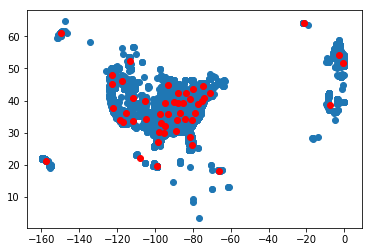

In [26]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'])
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], color='red')

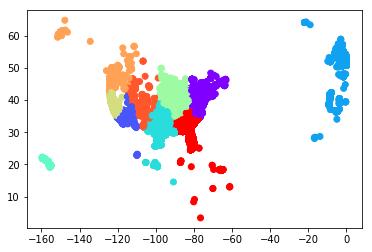

In [43]:
plt.scatter(df_us_samp['lng'], df_us_samp['lat'], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], c=kmeans.labels_, cmap='rainbow')

- plot these cluster centers
- plt.scatter(df['lat'], df['lng'], c=kmeans.labels_, cmap='rainbow')

In [46]:
inertia=[]
for k in range(1,200,50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_us_samp[['lat','lng']])
    inertia.append(kmeans.inertia_)

In [47]:
inertia

[62869902.733040385,
 60169.753081241404,
 22132.748745811237,
 11187.234521648952]

In [ ]:
inertia=[]
for k in range(1,2000,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_us_samp[['lat','lng']])
    inertia.append(kmeans.inertia_)